In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import optimizers

In [2]:
# load data
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# prepare data
x_train, x_test = x_train / 255.0, x_test / 255.0 # normalize
y_train_oh = utils.to_categorical(y_train, num_classes=10) # one-hot encoding
y_test_oh = utils.to_categorical(y_test, num_classes=10) # one-hot encoding

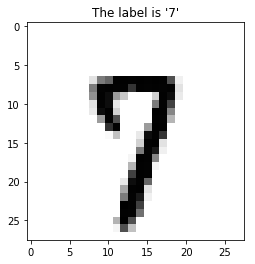

In [3]:
# plot one instance
plt.title("The label is '{label}'".format(label=y_train[888]))
plt.imshow(x_train[888], cmap='Greys')
plt.show()

In [5]:
model = tf.keras.models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# If we want to define the hyperparameters of optimizer
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999,
                       epsilon=None, decay=0.0, amsgrad=False) # I just copy the default hyperparameters here

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train_oh, epochs=5, batch_size=None) # If unspecified, batch_size will default to 32.
model.evaluate(x_test, y_test_oh)

Epoch 1/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.2078 - acc: 0.9385
Epoch 2/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0870 - acc: 0.9730
Epoch 3/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0590 - acc: 0.9812
Epoch 4/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0445 - acc: 0.9864
Epoch 5/5
10000/10000 [==============================] - ETA: 0s - loss: 0.0712 - acc: 0.980 - 0s 36us/sample - loss: 0.0679 - acc: 0.9817


[0.06789264299917268, 0.9817]